# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_59442/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

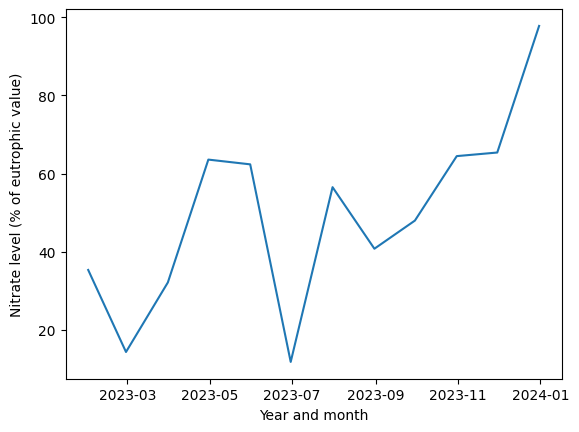

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_59442/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

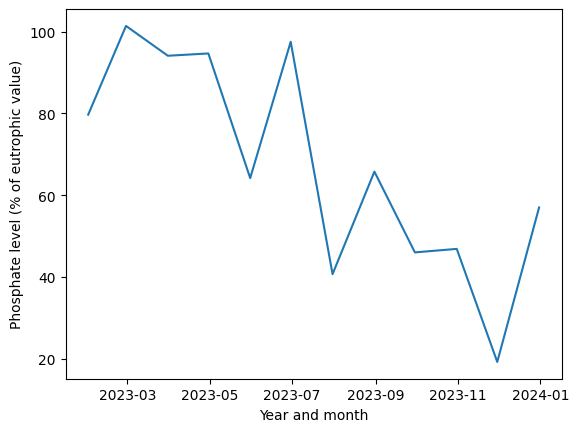

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

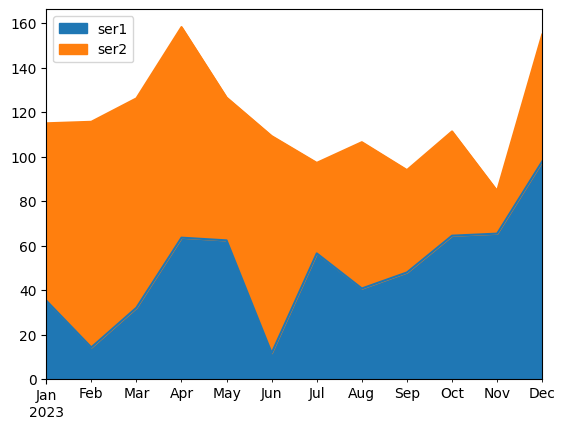

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

##### **Marketing Campaign Dataset**

In [5]:
#load dataset
marketing_campaign = pd.read_csv("marketing_campaign.csv", sep=';')
marketing_campaign.dropna(inplace=True)
marketing_campaign = marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue']) 
marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


**Correlation Matrix:**

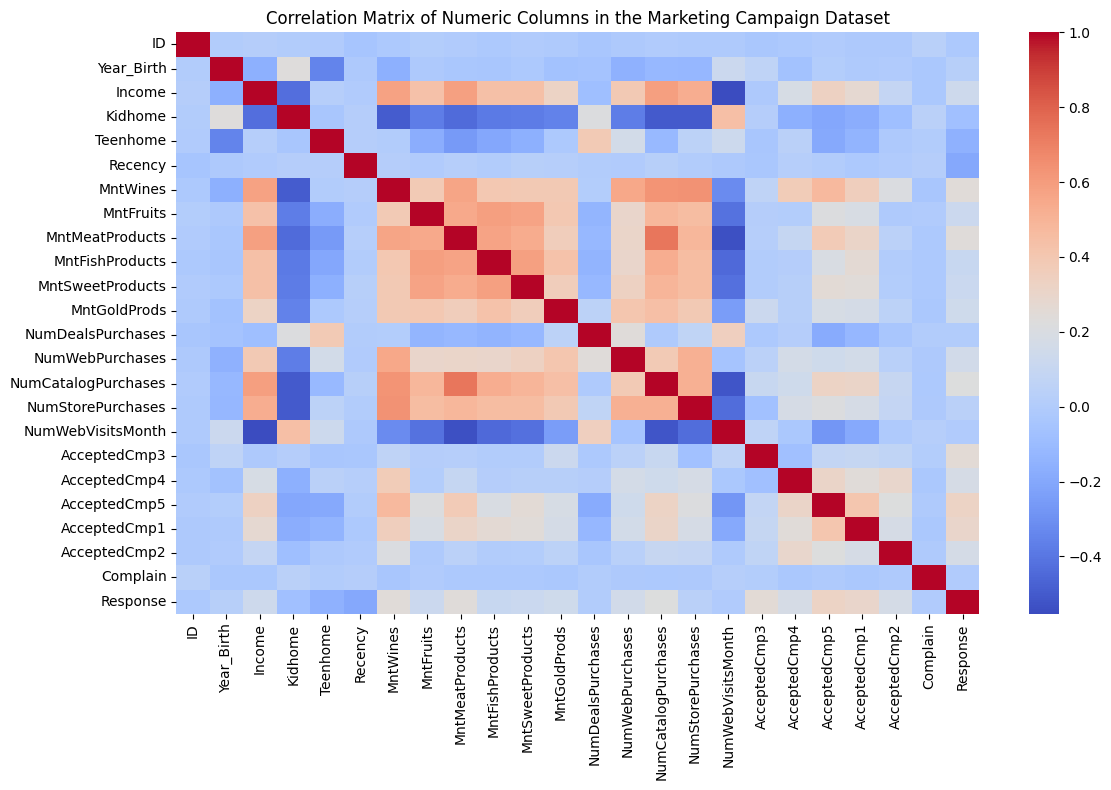

In [6]:
plt.figure(figsize=(12, 8))
mcorrelation = marketing_campaign.corr(numeric_only=True)
sns.heatmap(mcorrelation, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns in the Marketing Campaign Dataset')
plt.tight_layout()
plt.show()

The target variable is 'Response' which indicates whether or not a customer accepted the offer in the last campaign. These features were most strongly correlated with Response:

* There is a negative correlation between Response and Recency. This tells us that customers who recently made a purchase are less likely to accept the offer from the last campaign.

* There is also a positive correlation between Response and AcceptedCmp5 (whether or not customer accepted the offer in the 5th campaign).

##### Next, I created boxplots for the features that were strongly correlated with response.
##### Recency vs. Response

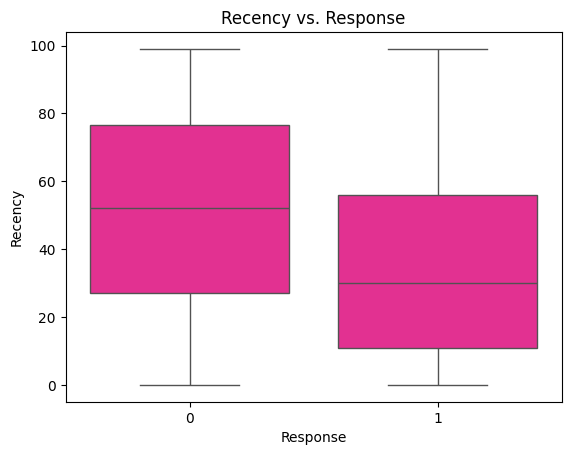

In [7]:
sns.boxplot(data=marketing_campaign, x='Response', y='Recency', color='deeppink')
plt.title('Recency vs. Response')
plt.show()

##### AcceptedCmp5 vs. Response

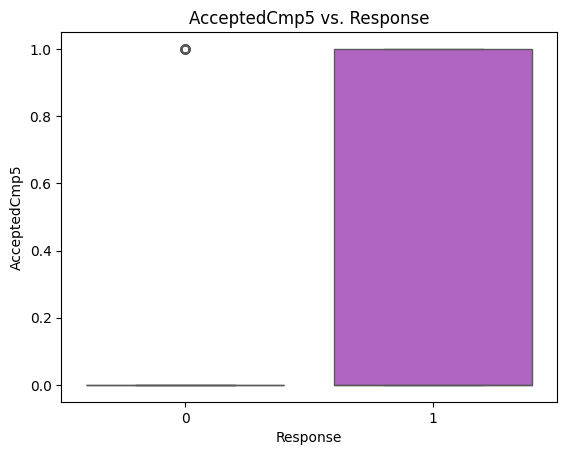

In [8]:
sns.boxplot(data=marketing_campaign, x='Response', y='AcceptedCmp5', color='mediumorchid')
plt.title('AcceptedCmp5 vs. Response')
plt.show()

In [9]:
marketing_campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

##### Next, I drew pairplots:

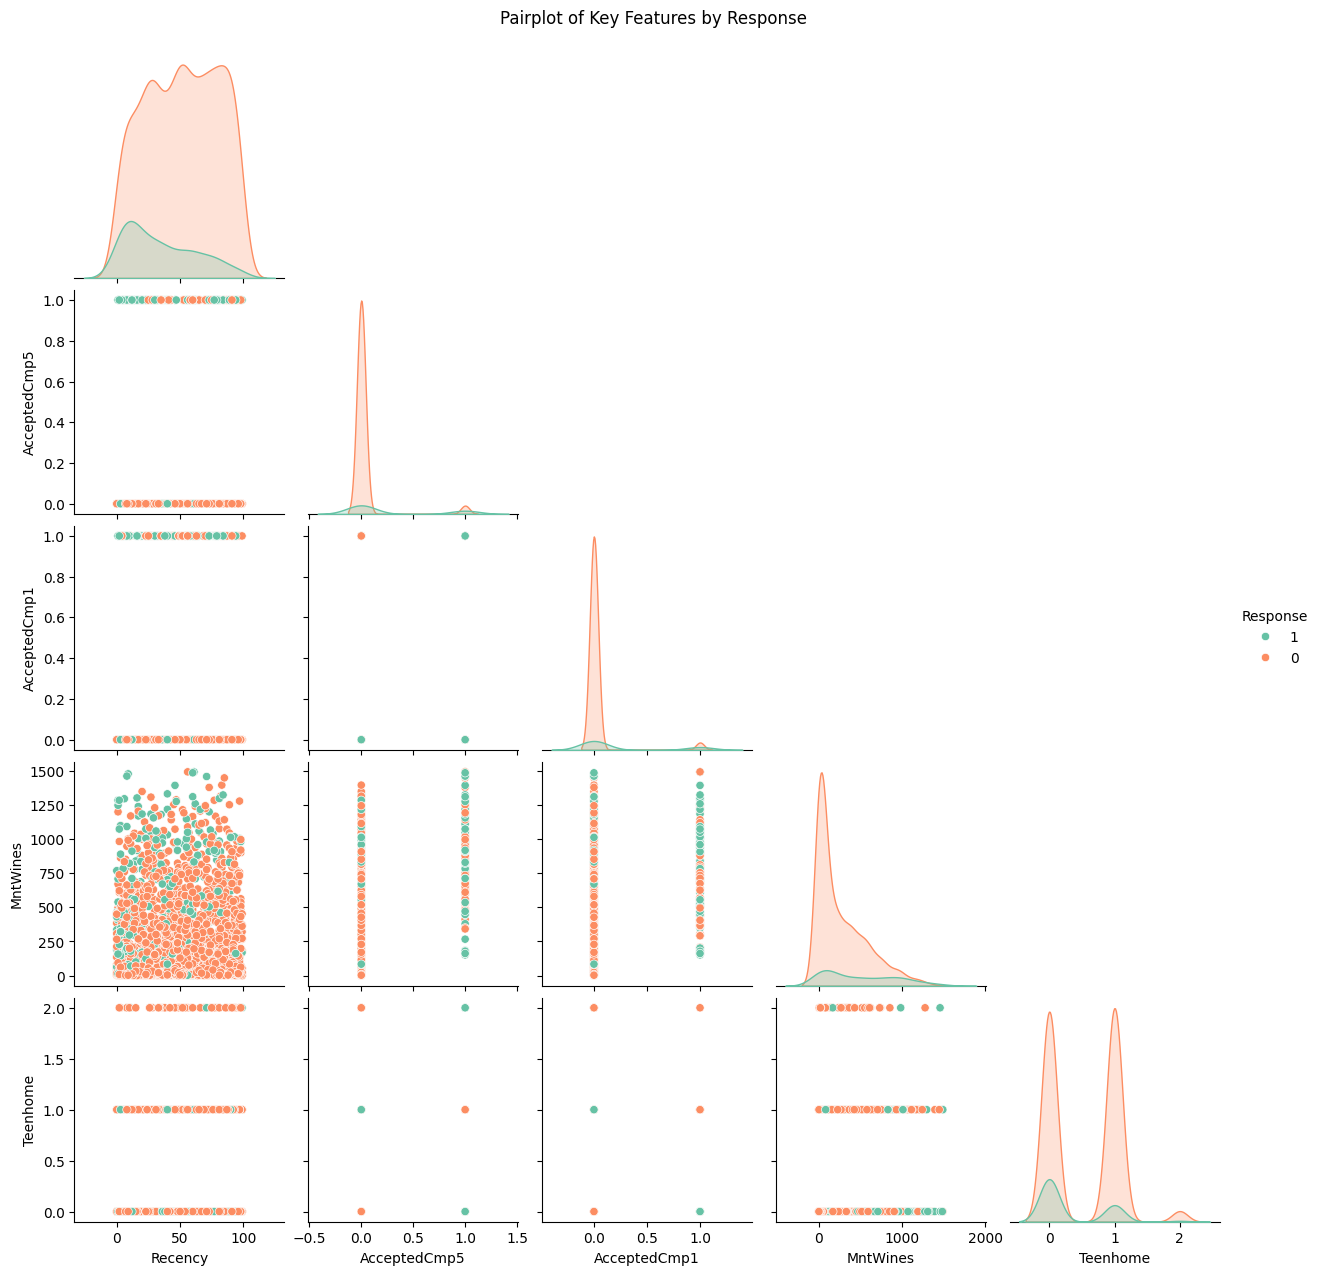

In [10]:
cols = ['Recency', 'AcceptedCmp5', 'AcceptedCmp1', 'MntWines', 'Teenhome']
marketing_campaign['Response'] = marketing_campaign['Response'].astype(str) #ensure that 'Churn' is categorical
#plot
sns.pairplot(marketing_campaign[cols+['Response']], hue='Response', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Key Features by Response', y=1.02)
plt.show()

##### Explore the categorical columns ('Education', 'Marital_Status') and their relationship with customer response.

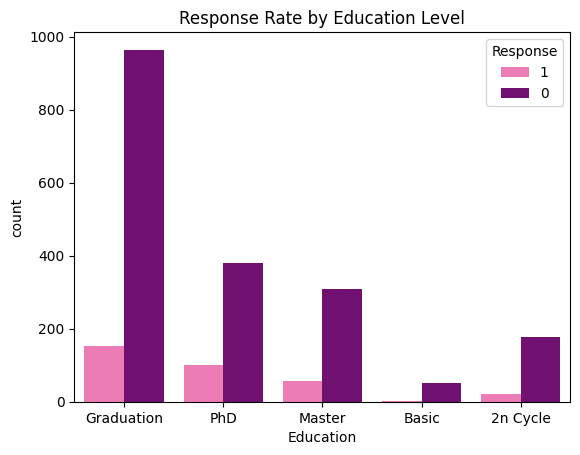

In [11]:
#response by education level
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=marketing_campaign, x='Education', hue='Response', palette=colors)
plt.title('Response Rate by Education Level')
plt.show()

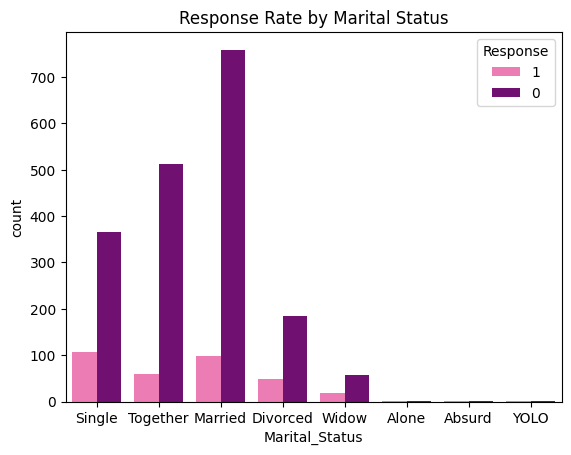

In [12]:
#response by marital status
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=marketing_campaign, x='Marital_Status', hue='Response', palette=colors)
plt.title('Response Rate by Marital Status')
plt.show()

##### **Digital Marketing Campaign Dataset**

In [13]:
#load dataset:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head() #display first couple rows

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


**Correlation Matrix:**

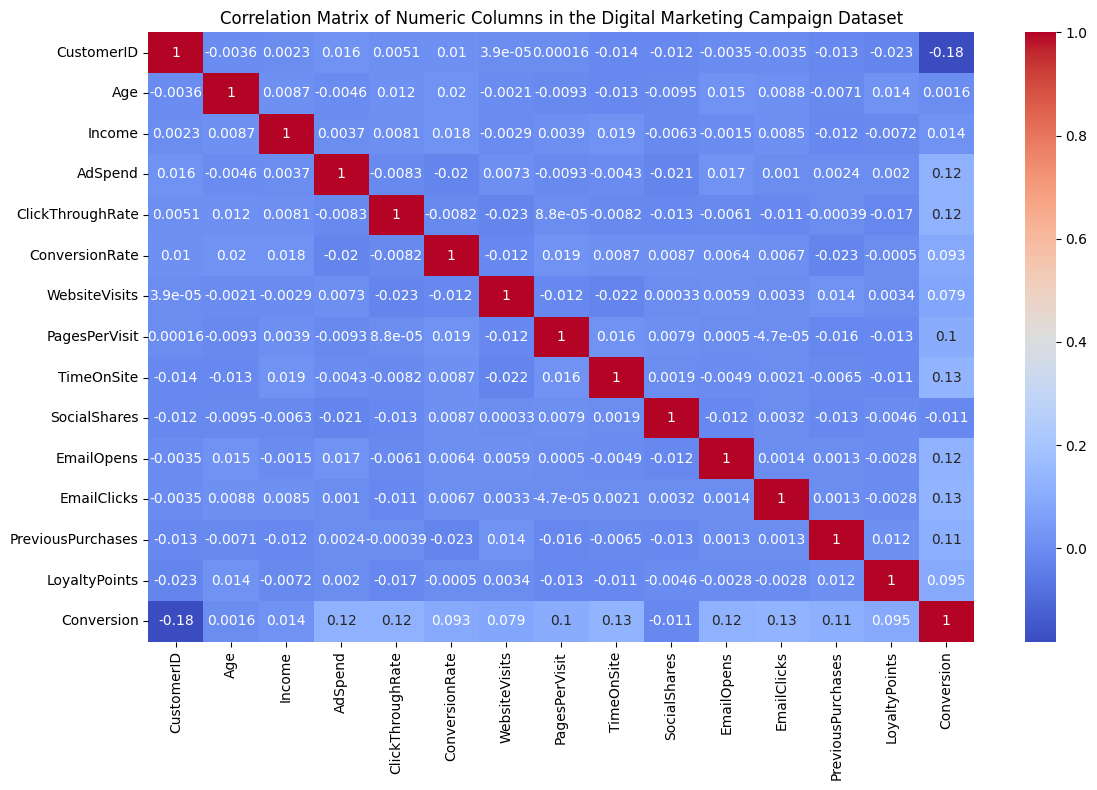

In [14]:
plt.figure(figsize=(12, 8))
dmcorrelation = dm_campaign.corr(numeric_only=True)
sns.heatmap(dmcorrelation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns in the Digital Marketing Campaign Dataset')
plt.tight_layout()
plt.show()

Most highly correlated with target variable (Conversion):
* EmailClicks: # of times links in marketing emails were clicked
* TimeOnSite: Average time spent on the website per visit (in minutes)
* ClickThroughRate: Rate at which customers click on the marketing content

##### Next, I created boxplots for the features that were strongly correlated with conversion:
##### EmailClicks vs. Conversion

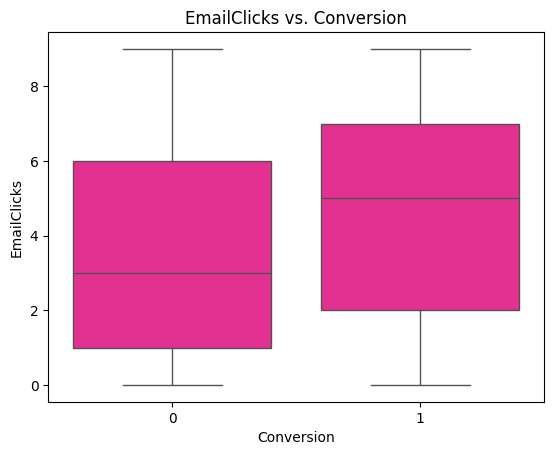

In [15]:
sns.boxplot(data=dm_campaign, x='Conversion', y='EmailClicks', color='deeppink')
plt.title('EmailClicks vs. Conversion')
plt.show()

##### TimeOnSite vs. Conversion

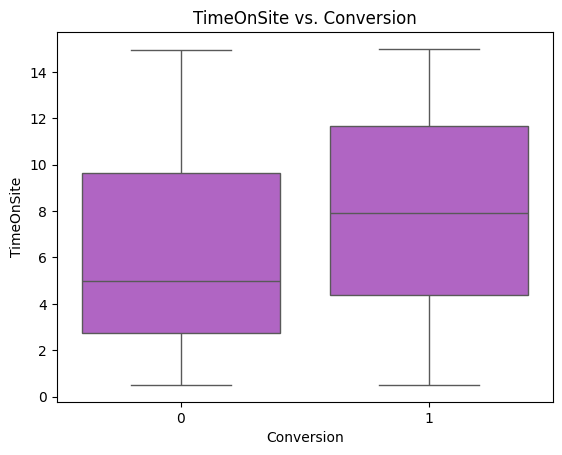

In [16]:
sns.boxplot(data=dm_campaign, x='Conversion', y='TimeOnSite', color='mediumorchid')
plt.title('TimeOnSite vs. Conversion')
plt.show()

##### ClickThroughRate vs. Conversion

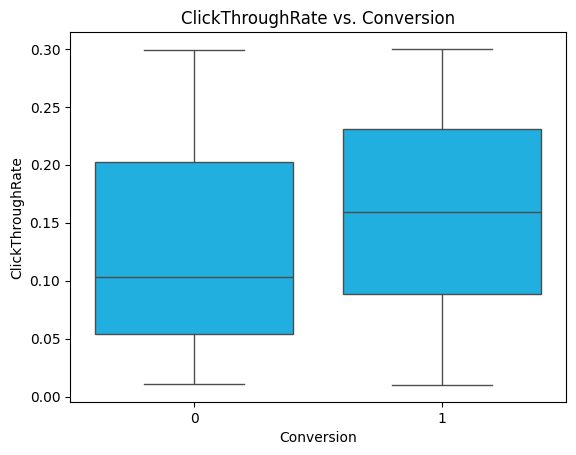

In [17]:
sns.boxplot(data=dm_campaign, x='Conversion', y='ClickThroughRate', color='deepskyblue')
plt.title('ClickThroughRate vs. Conversion')
plt.show()

##### Pairplots:

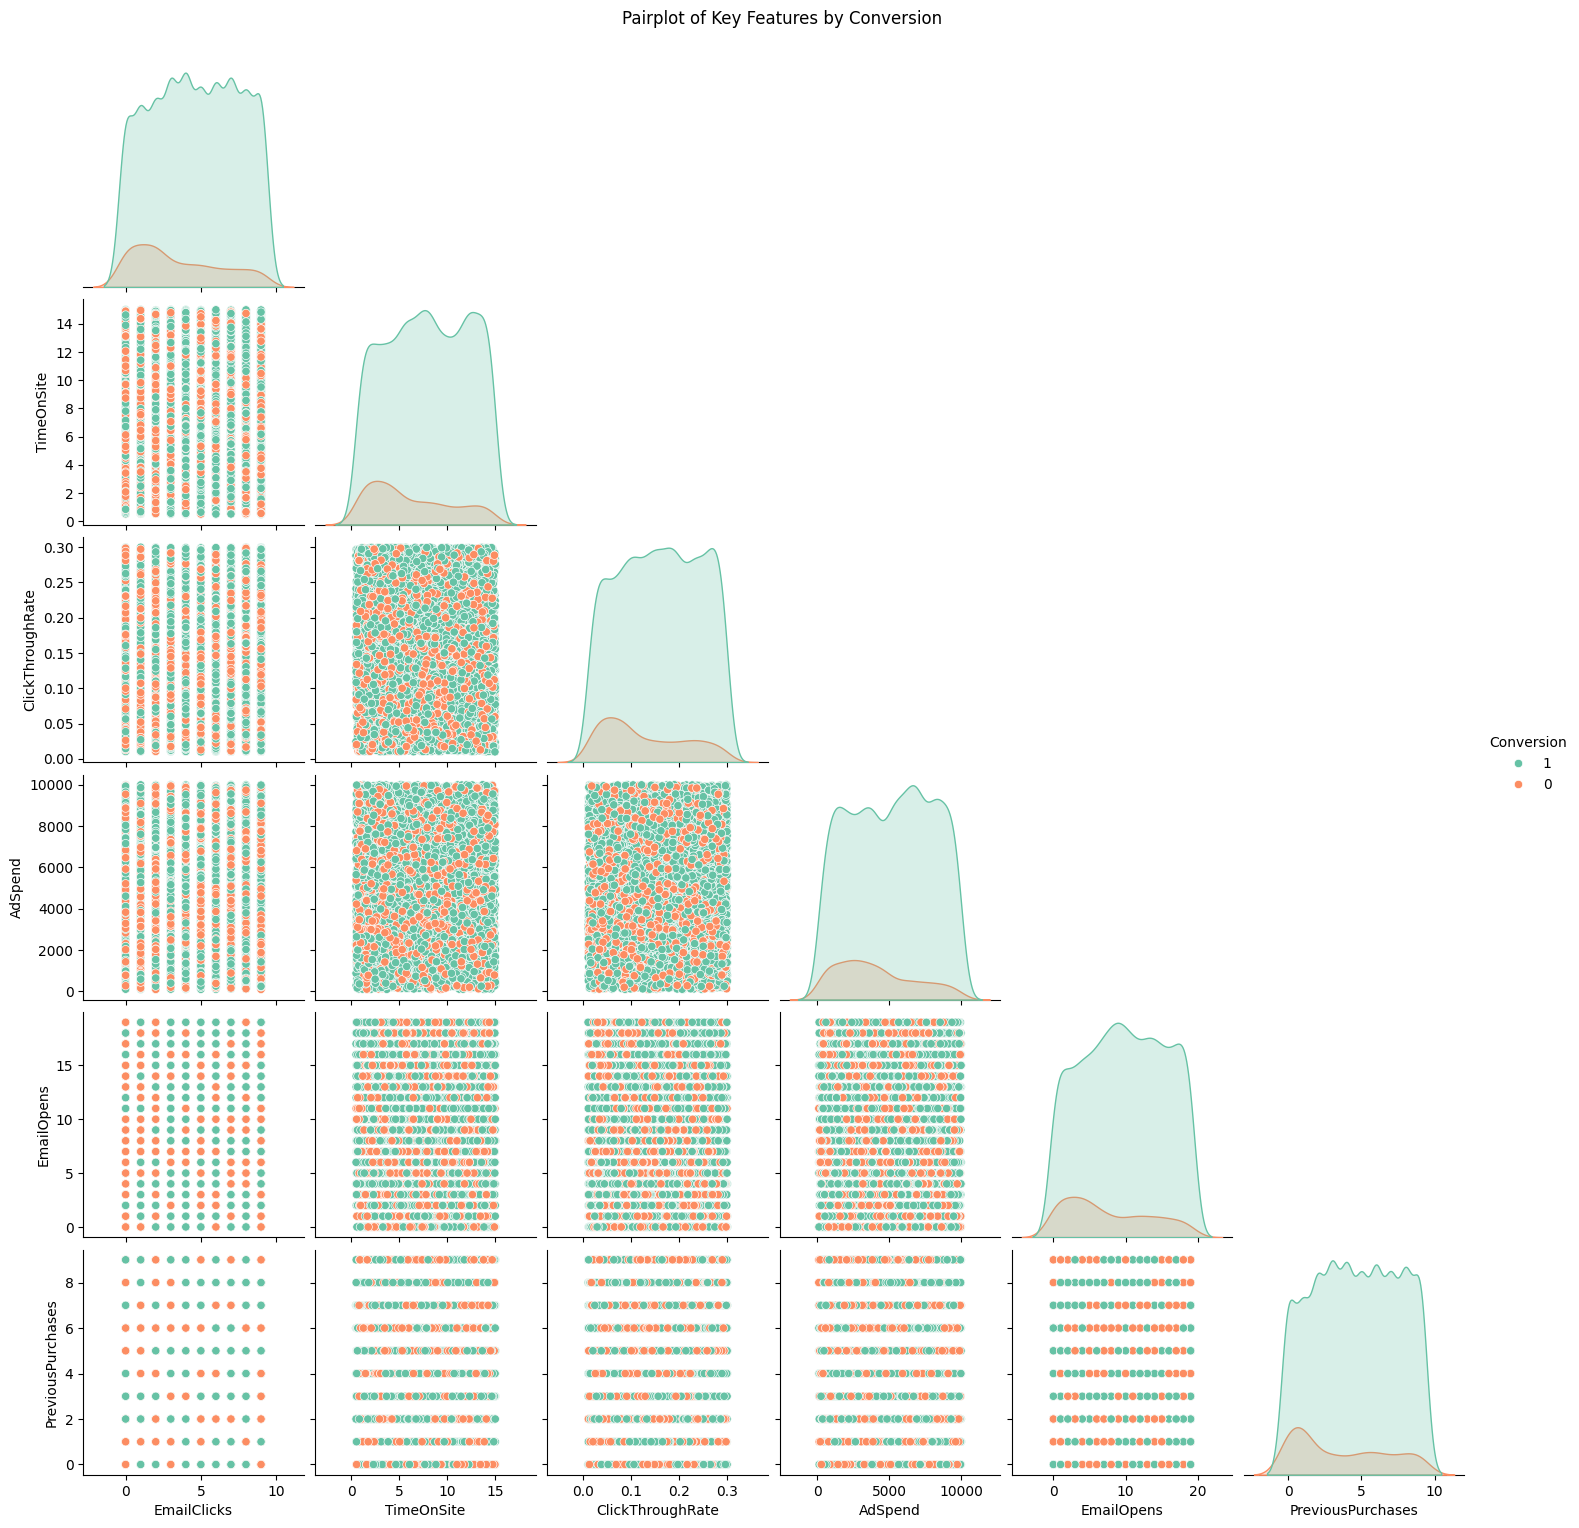

In [18]:
cols = ['EmailClicks', 'TimeOnSite', 'ClickThroughRate', 'AdSpend', 'EmailOpens', 'PreviousPurchases']
dm_campaign['Conversion'] = dm_campaign['Conversion'].astype(str) #ensure that 'Churn' is categorical
#plot
sns.pairplot(dm_campaign[cols+['Conversion']], hue='Conversion', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Key Features by Conversion', y=1.02)
plt.show()

##### Explore the categorical columns ('Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool') and their relationship with customer conversion.

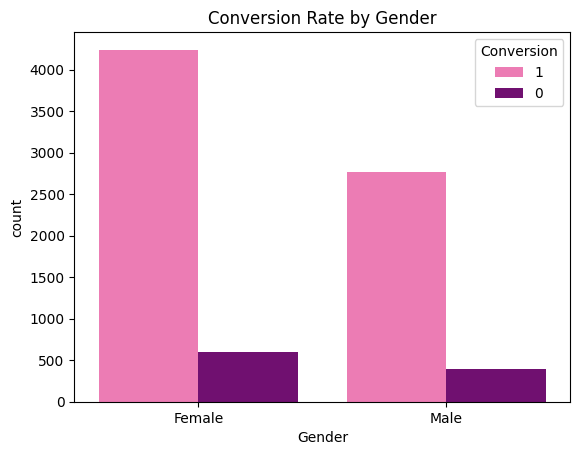

In [19]:
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=dm_campaign, x='Gender', hue='Conversion', palette=colors)
plt.title('Conversion Rate by Gender')
plt.show()

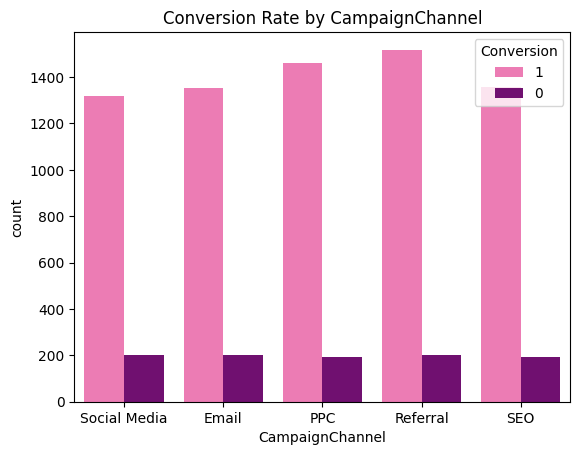

In [20]:
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=dm_campaign, x='CampaignChannel', hue='Conversion', palette=colors)
plt.title('Conversion Rate by CampaignChannel')
plt.show()

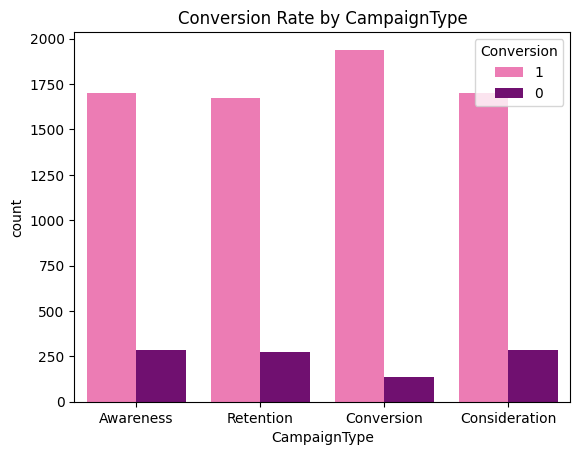

In [21]:
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=dm_campaign, x='CampaignType', hue='Conversion', palette=colors)
plt.title('Conversion Rate by CampaignType')
plt.show()

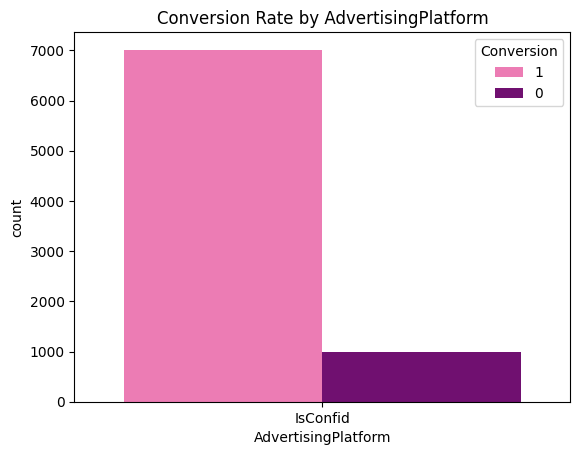

In [22]:
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=dm_campaign, x='AdvertisingPlatform', hue='Conversion', palette=colors)
plt.title('Conversion Rate by AdvertisingPlatform')
plt.show()

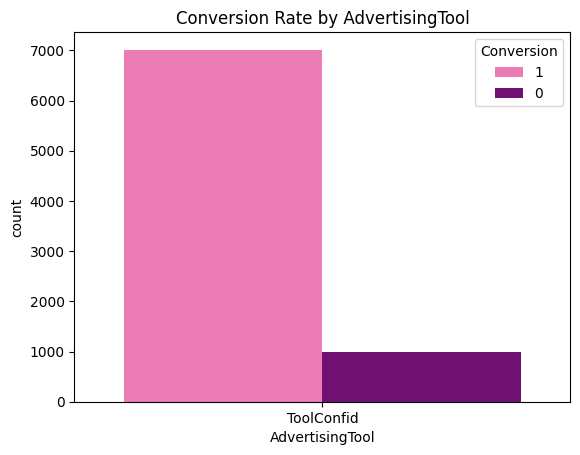

In [23]:
colors = ['hotpink', 'purple'] #custom color palette for response
sns.countplot(data=dm_campaign, x='AdvertisingTool', hue='Conversion', palette=colors)
plt.title('Conversion Rate by AdvertisingTool')
plt.show()

##### **Customer Churn Dataset**

##### Load Dataset:

In [24]:
train_cc = pd.read_csv('customer_churn_dataset-training-master.csv')
test_cc = pd.read_csv('customer_churn_dataset-testing-master.csv')

##### The dataset is split into training and testing sets. I combined the two to do analysis on the whole dataset:

In [25]:
customer_churn = pd.concat([train_cc, test_cc], ignore_index=True)
customer_churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


##### To find correlations between the numeric features, I used a correlation matrix:

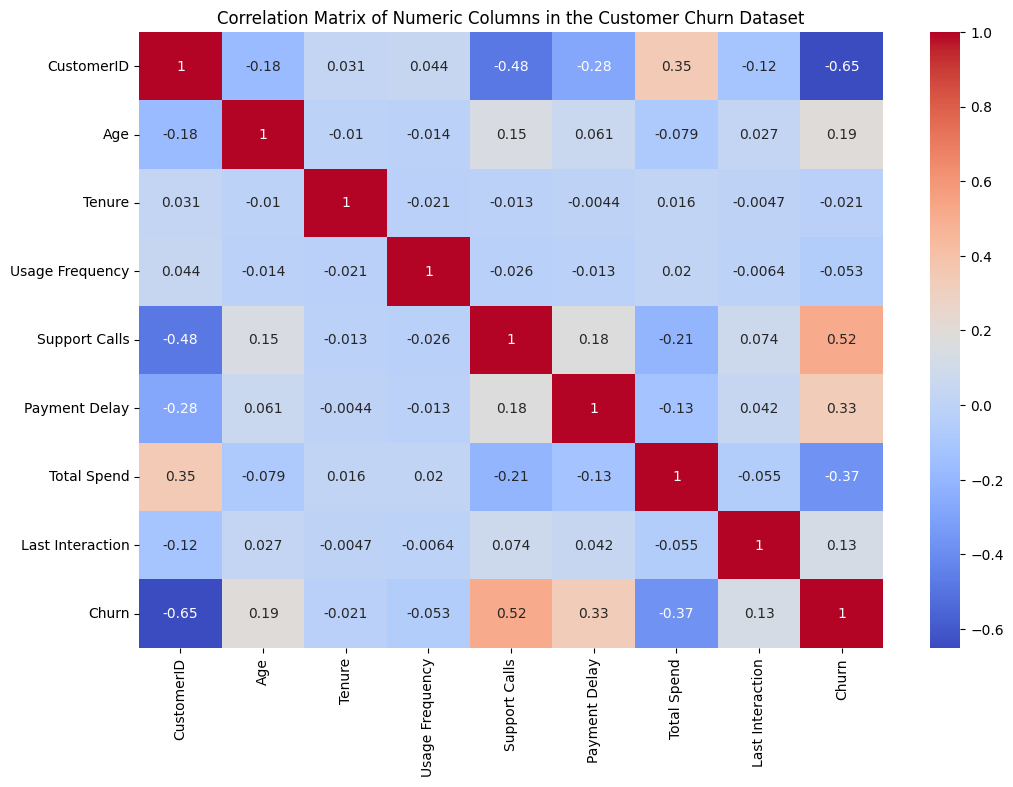

In [26]:
plt.figure(figsize=(12, 8))
correlation = customer_churn.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns in the Customer Churn Dataset')
plt.show()

Upon viewing this correlation matrix, I noted an unusually strong relationship between Churn and Customer ID. CustomerID serves as an identifier and should not correlate with anything meaningful. This could indicate that CustomerIDs were issued sequentially in a way that correlated with churn. For this reason, I will be ignoring CustomerID in the analysis.

There is a strong correlation between Churn and Support Calls. This tells us that customers who churn tend to call support more.

There is also correlation between Churn and Payment Delay. Delayed payments may be a warning sign.

There is also correlation between Churn and Total spend. This tells us that those who spend more are less likely to churn.

##### Next, I created boxplots for the features that were strongly correlated with churn. Since churn is categorical, boxplots will better display the relationship between churn and the chosen feature. 

##### Support Calls vs. Churn:

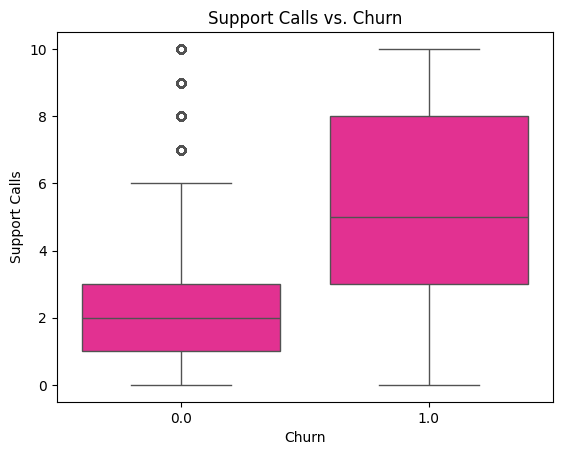

In [27]:
sns.boxplot(data=customer_churn, x='Churn', y='Support Calls', color='deeppink')
plt.title('Support Calls vs. Churn')
plt.show()

##### Payment Delay vs. Churn:

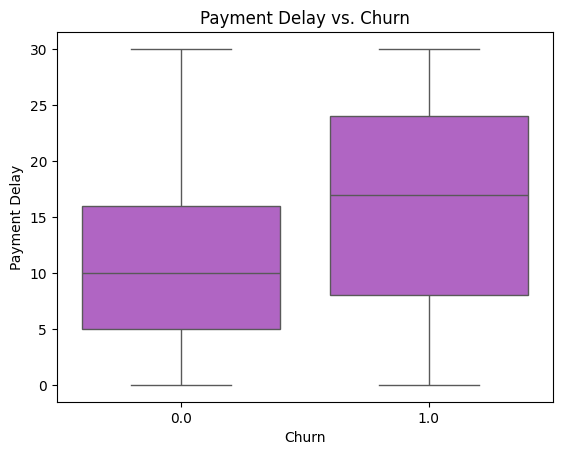

In [28]:
sns.boxplot(data=customer_churn, x='Churn', y='Payment Delay', color='mediumorchid')
plt.title('Payment Delay vs. Churn')
plt.show()

##### Total Spend vs. Churn:

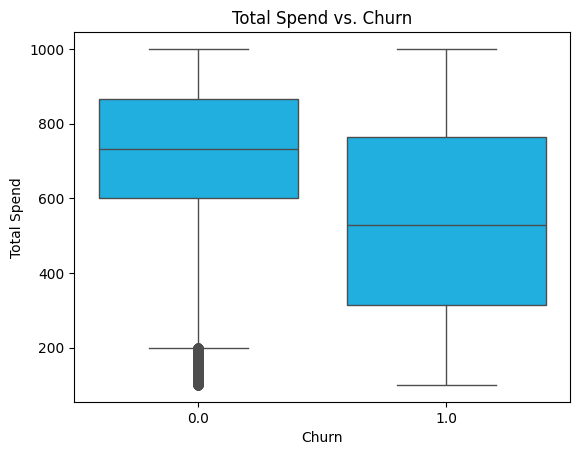

In [29]:
sns.boxplot(data=customer_churn, x='Churn', y='Total Spend', color='deepskyblue')
plt.title('Total Spend vs. Churn')
plt.show()

##### Next, I drew pairplots:
I chose to include the following columns:
* 'Support Calls': Has a strong positive correlation with 'Churn'.
* 'Payment Delay': Correlated with 'Churn' and 'Support Calls'.
* 'Total Spend': Has a negative correlation with 'Churn'.
* 'Tenure': Indicates whether customer is loyal vs. new. Relevant to churn analysis.
* 'Age': Had a weak correlation with 'Churn' but adds demographic conetext

In [30]:
cols = ['Support Calls', 'Payment Delay', 'Total Spend', 'Tenure', 'Age']
customer_churn['Churn'] = customer_churn['Churn'].astype(str) #ensure that 'Churn' is categorical
#plot
sns.pairplot(customer_churn[cols+['Churn']], hue='Churn', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Key Features by Churn', y=1.02)
plt.show()

: 

##### After analyzing the numeric features, it is time to explore the categorical columns ('Gender', 'Subscription Type', and 'Gender') and their relationship with customer churn.

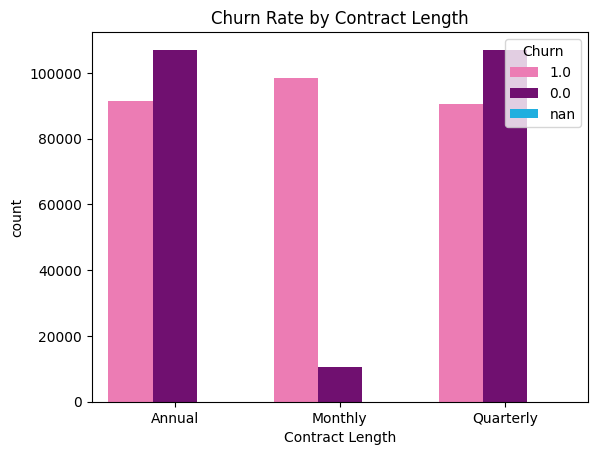

In [ ]:
#churn by contract length
colors = ['hotpink', 'purple', 'deepskyblue'] #custom color palette for churn
sns.countplot(data=customer_churn, x='Contract Length', hue='Churn', palette=colors)
plt.title('Churn Rate by Contract Length')
plt.show()

* Customers on a monthly contract are more likely to churn than those on annual or quarterly contracts.

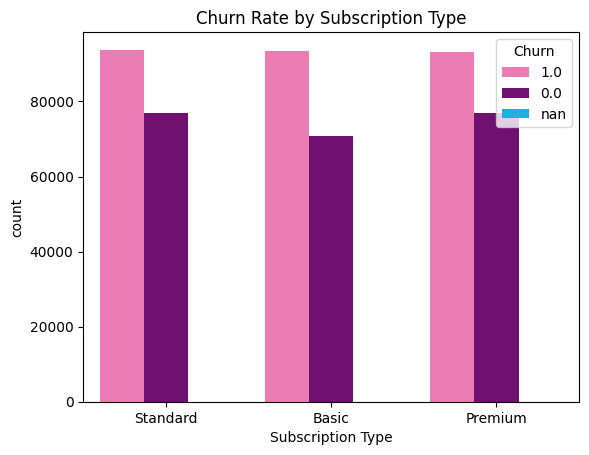

In [ ]:
#churn by subscription type
colors = ['hotpink', 'purple', 'deepskyblue'] #custom color palette for churn
sns.countplot(data=customer_churn, x='Subscription Type', hue='Churn', palette=colors)
plt.title('Churn Rate by Subscription Type')
plt.show()

* All three subscription types have very similar churn and no churn patterns, indicating that subscription type foes not significantly impact churn.

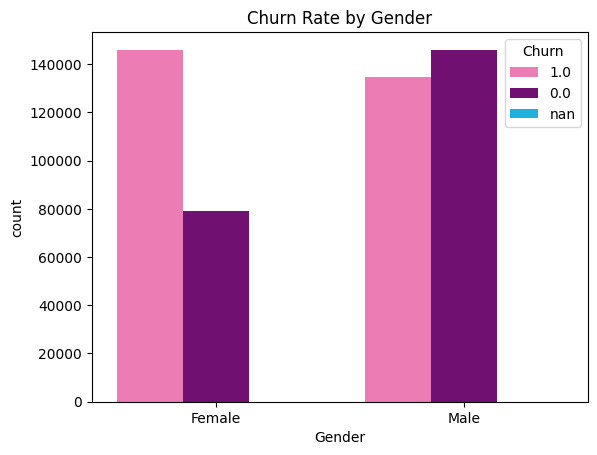

In [ ]:
#churn by gender
colors = ['hotpink', 'purple', 'deepskyblue'] #custom color palette for churn
sns.countplot(data=customer_churn, x='Gender', hue='Churn', palette=colors)
plt.title('Churn Rate by Gender')
plt.show()

* Churn is much higher than no-churn for female populations. There might be a gender-based behavioral difference in churn, where female customers are more likely to churn than male customers. However, other factors, such as age and tenure, could confound this.

#### Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
* The data look clean and interpretable. The data are usable for modeling and analysis!

Do you see any outliers?  (Data points that are far from the rest of the data).
* I spotted outliers in a few areas. Looking at the boxplots, there are outliers in the 'Support Calls', 'Payment Delay', and 'Total Spend' columns. Specifically, in 'Support Calls' there are customers that made higher number of calls (8-10 calls) which is above the typical range for most people (<6 calls). 'Payment Delay', and 'Total Spend' have wider ranges but the outliers are not too extreme. 

Are any data items highly correlated with each other, suggesting that they are redundant?
* Most variables were not very highly correlated. 

Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
* Customer Tenure could affect 'Total Spend' and 'Churn'. A long-time customer most likely spends more and is less likely to churn, indicating that the correlation between spend and churn might reflect tenure. Outside of the dataset, features such as the quality of service, location, and the type of subscription (if there are different tiers) might affect churn.

Additonal Notes:
* The count plots revealed some important categorical trends in churn behavior. Contract length is predictive of churn: customers on monthly plans churn far more than those on quarterly or annual plans. Subscription type does not show major differences in churn behavior. This was particularly surprising to me because I initially thought that plan tiers might affect churn status. There is a skew in gender and churn behavior, but this could be impacted by other factors. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

##### I decided to recreate a bar graph, similar to in Figure 3.16, where contrast was used to strategically highlight a certain feature (in their case, the performance of their business). 

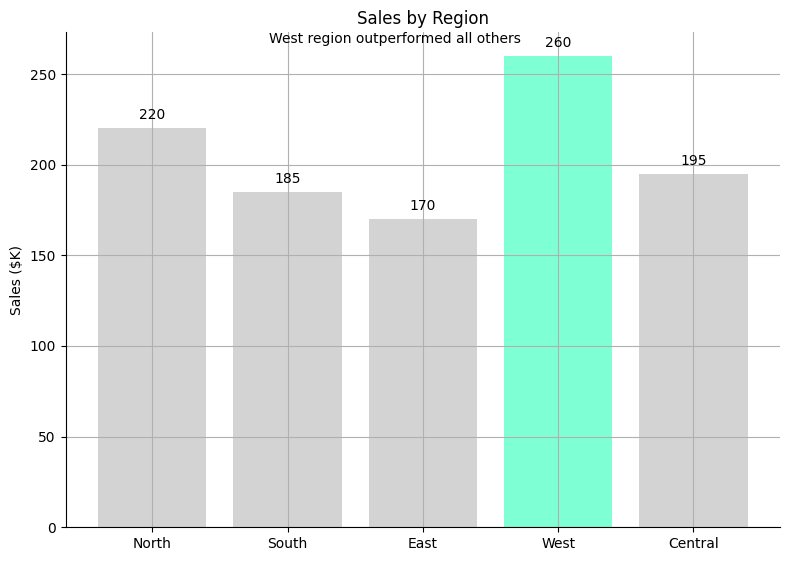

In [ ]:
#sales by region (mock data)
regions = ["North", "South", "East", "West", "Central"]
sales = [220, 185, 170, 260, 195]
hightlight_index = 3 #highlights west region
#set bar colors for highlighted vs non highlighted
colors = ['lightgray'] * len(sales)
colors[hightlight_index] = 'aquamarine'
#plot
plt.figure(figsize=(8, 6))

bars = plt.bar(regions, sales, color=colors)
#add labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+5, f"{sales[i]}", ha='center', fontsize=10)
plt.title("Sales by Region")
plt.suptitle("West region outperformed all others", fontsize=10, y=0.89)
plt.ylabel("Sales ($K)")
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()